# Team-grey

1.   **Ivon Ivanova**
2.   **Lizzie Harvey**
3.   **Megico Maria Nayagam** 


# Object Detection

The objective is to identify 10 objects within a series of images. The objects to detect are,


*   Phone
*   Laptop

*   Mouse
*  Keyboard

*   Satellite Dish
*   Server Rack

*   Magnifying Glass
*   Keys

*   USB Stick
*   Router



Created custom dataset by downloading the images using **Bing downloader** and **Fatkun Batch Download Image**. The dataset was cleaned manually, removed images with unsupported formats. 

In order to train the custom model, the cleaned images were formed as a dataset of representative images with bounding box annotations around the objects that need to be detected. 
This is done by using **Roboflow** application. Once the annotation is done, the Preprocessing steps like Auto-orient and Resize were appliled to the dataset. The dataset was split into training 75%, validation 20% and test sets 5% .The dataset was generated and converted to the YOLOV8 format.

Custom configuration file have been created automatically by Roboflow named **'data.yaml'**, in which it has the path for the train, valid and test folder. Also it has the number of classes and the names of each class. This 'data.yaml' file is used for the training process.

## **Installing Requirements**

In [ ]:
!nvidia-smi

Thu Mar 23 21:53:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**The below command installs all the packages that are required to use YOLOv8 for detection and training the custom data.**

In [ ]:
!pip install ultralytics==8.0.20

In [ ]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 5.8 MB/s eta 0:00:00


## **Importing required libraries**

In [ ]:
import os

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

from roboflow import Roboflow

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


### **Downloading the dataset from Roboflow into the folder datasets**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="EtzTucQkOYnHT0XWTzd2")
project = rf.workspace("code-first-girls").project("mlchallenge")
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MLChallenge-2 in yolov8:: 100%|██████████| 1747/1747 [00:00<00:00, 4058.17it/s]


# **Training Custom Yolov8 model**

Experimented with different pretrained Yolov models with our custom dataset such as YOLOV5s, YOLOV5x6, YOLOV7 and YOLOV8s, YOLOV8m, YOLOV8l and YOLOV8x. After training with different models YOLOV8x showed better performance than the other models.

The model was initially trained with all the default parameters. To improve the performance of the model the custom dataset experimented with different number of epochs 50, 100, 200, 300 and with batch size of 8, 16.

Finally, YOLOV8x model is trained to detect the custom dataset for 300 epochs with batch size of 16. The image size parameter has been reduced from the default setting 640 to 224, because most of the images in the custom dataset has dimension lesser than the default dimension.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=16 epochs=300 imgsz= 224 plots=True name=yolov8x_300

/content
100% 131M/131M [00:00<00:00, 244MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/MLChallenge-2/data.yaml, epochs=300, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=yolov8x_300, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

**After training the model for 300 epochs the Yolov8x model obtained Precision score of 0.79, Recall score of 0.70, Mean Average Precision(mAP50) - 0.77 and mAP50-95 - o.65.**

In [ ]:
!ls {HOME}/runs/detect/yolov8x_300/

args.yaml					    train_batch11891.jpg
confusion_matrix.png				    train_batch11892.jpg
events.out.tfevents.1679608652.9b6d9aeb63b9.2401.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch11890.jpg				    weights


### **Visualizing the results obtained by the custom yolov8x model**

### **Confusion Matrix**



/content


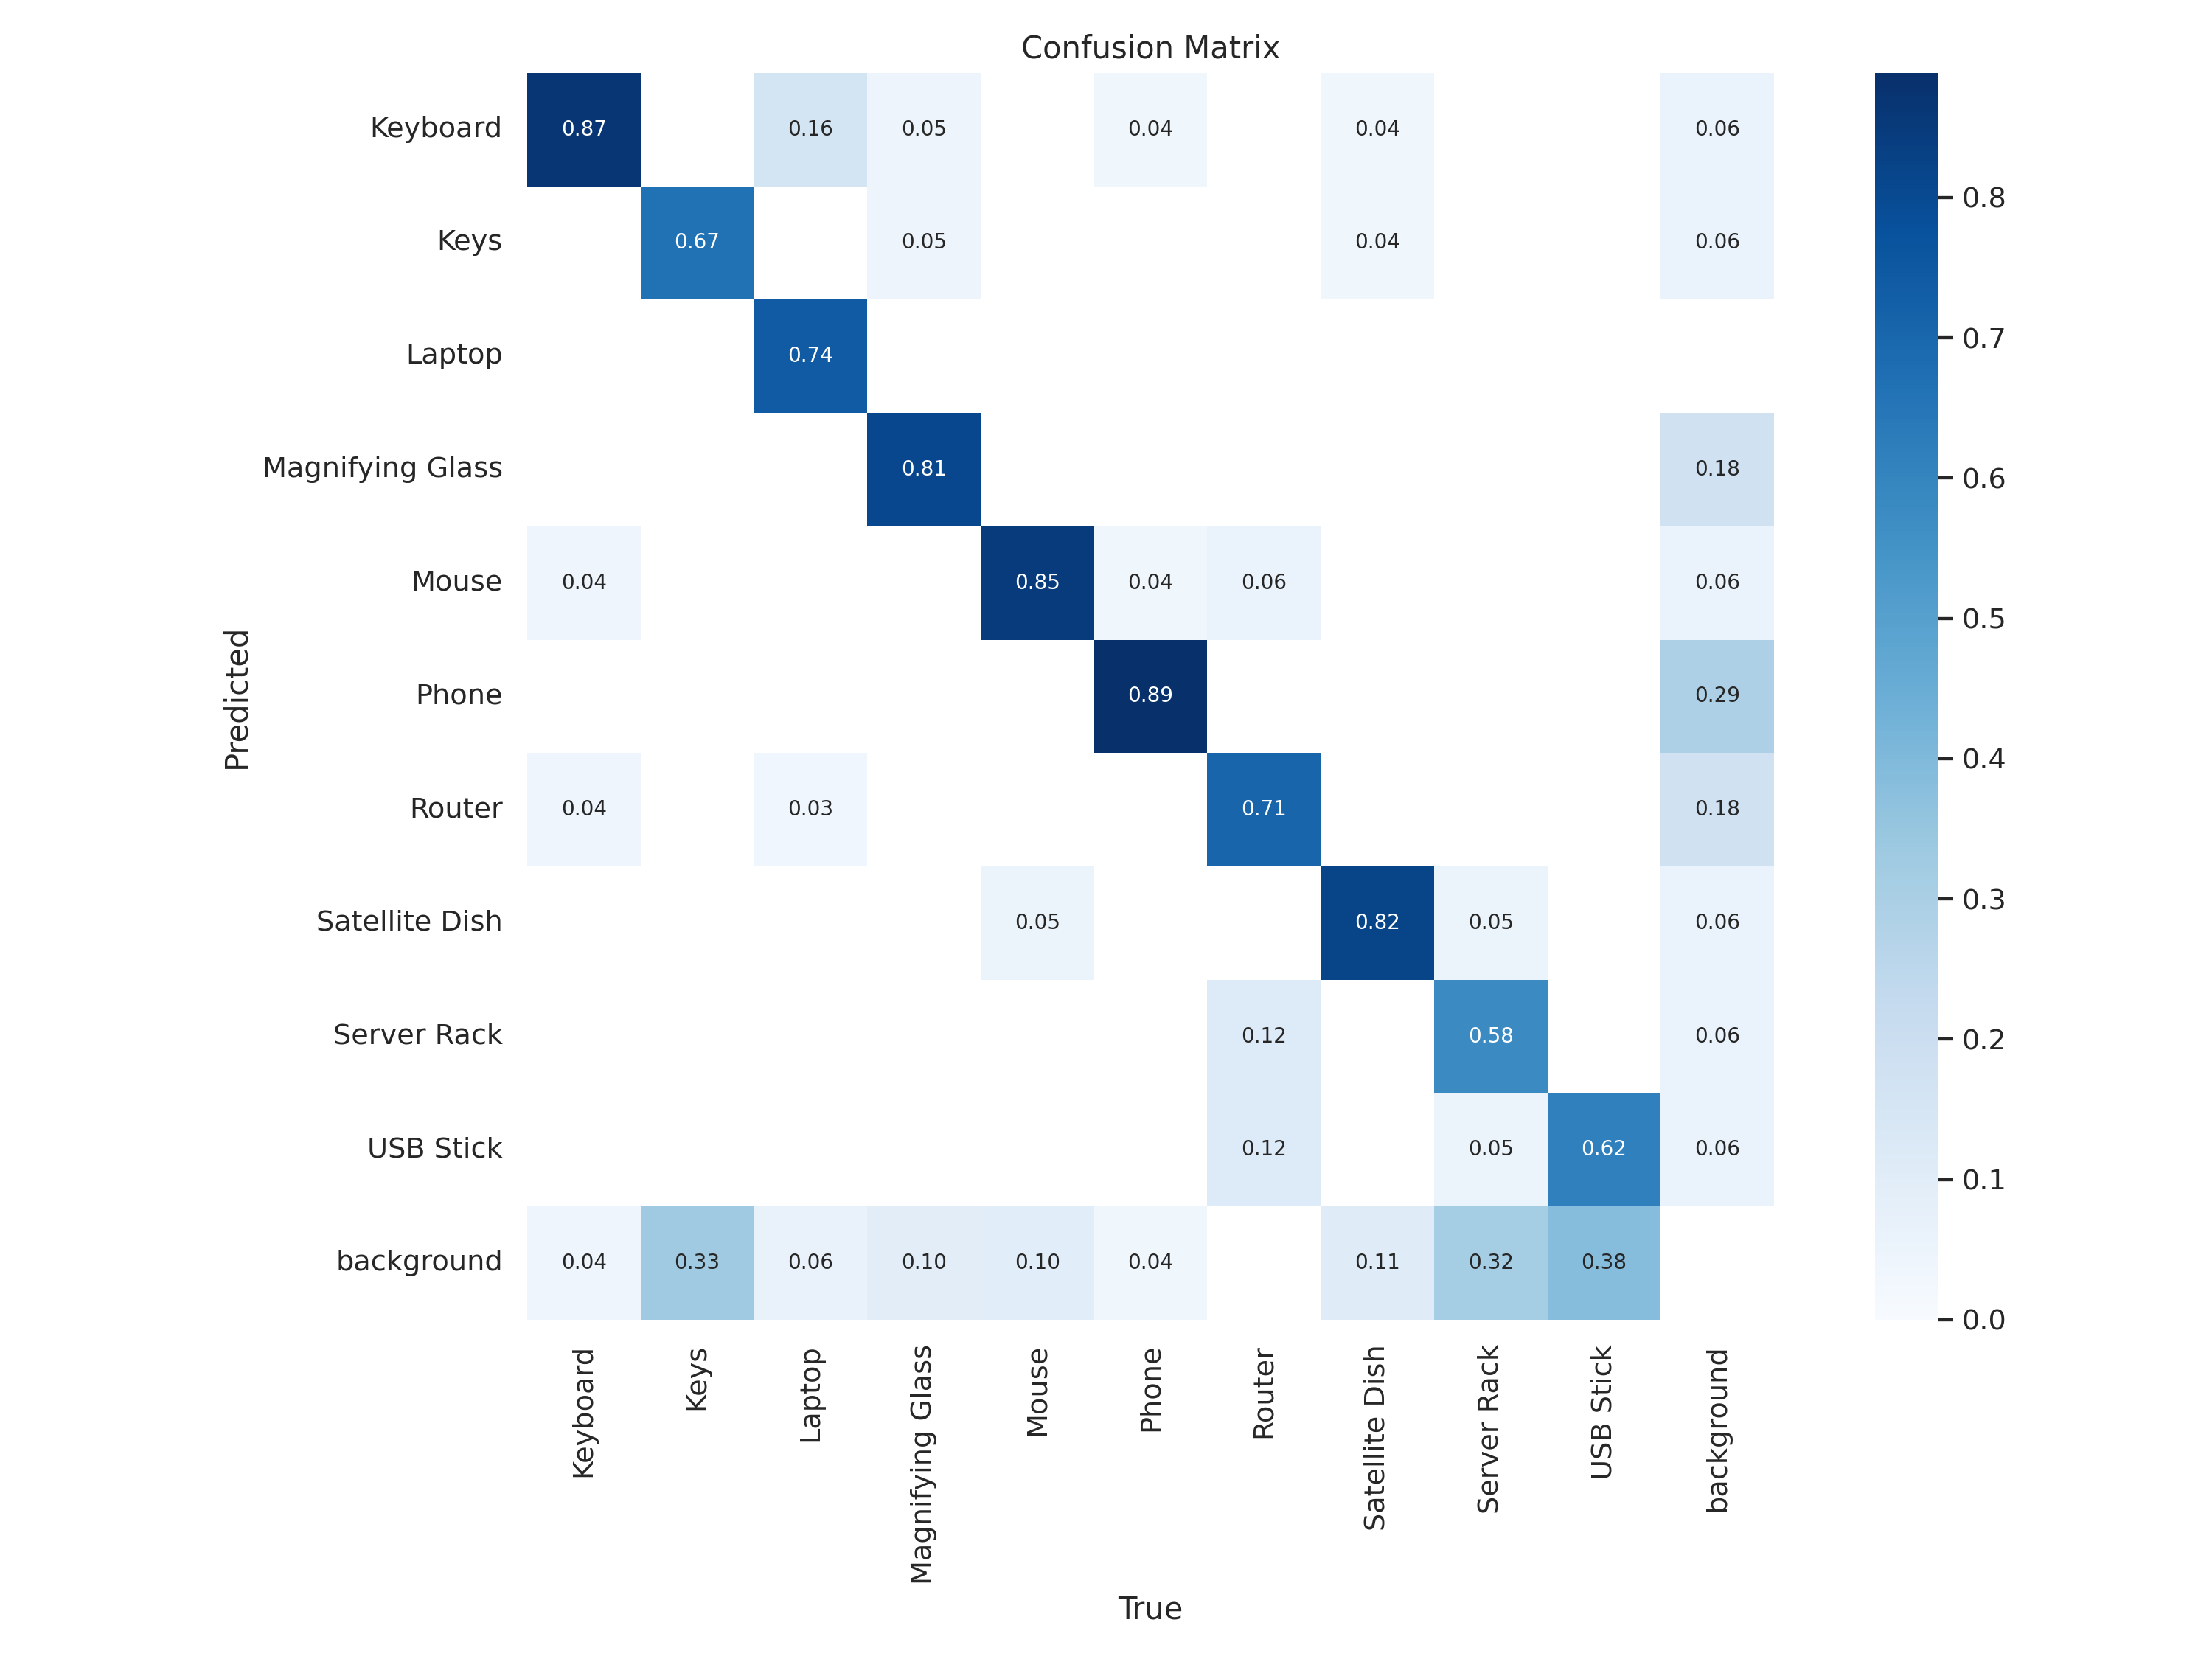

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8x_300/confusion_matrix.png', width=800)

### **F1 Confidence curve**

The F1 metric measures the balance between precision and recall. As the F1 score is high, the precision and recall are also high. 

/content


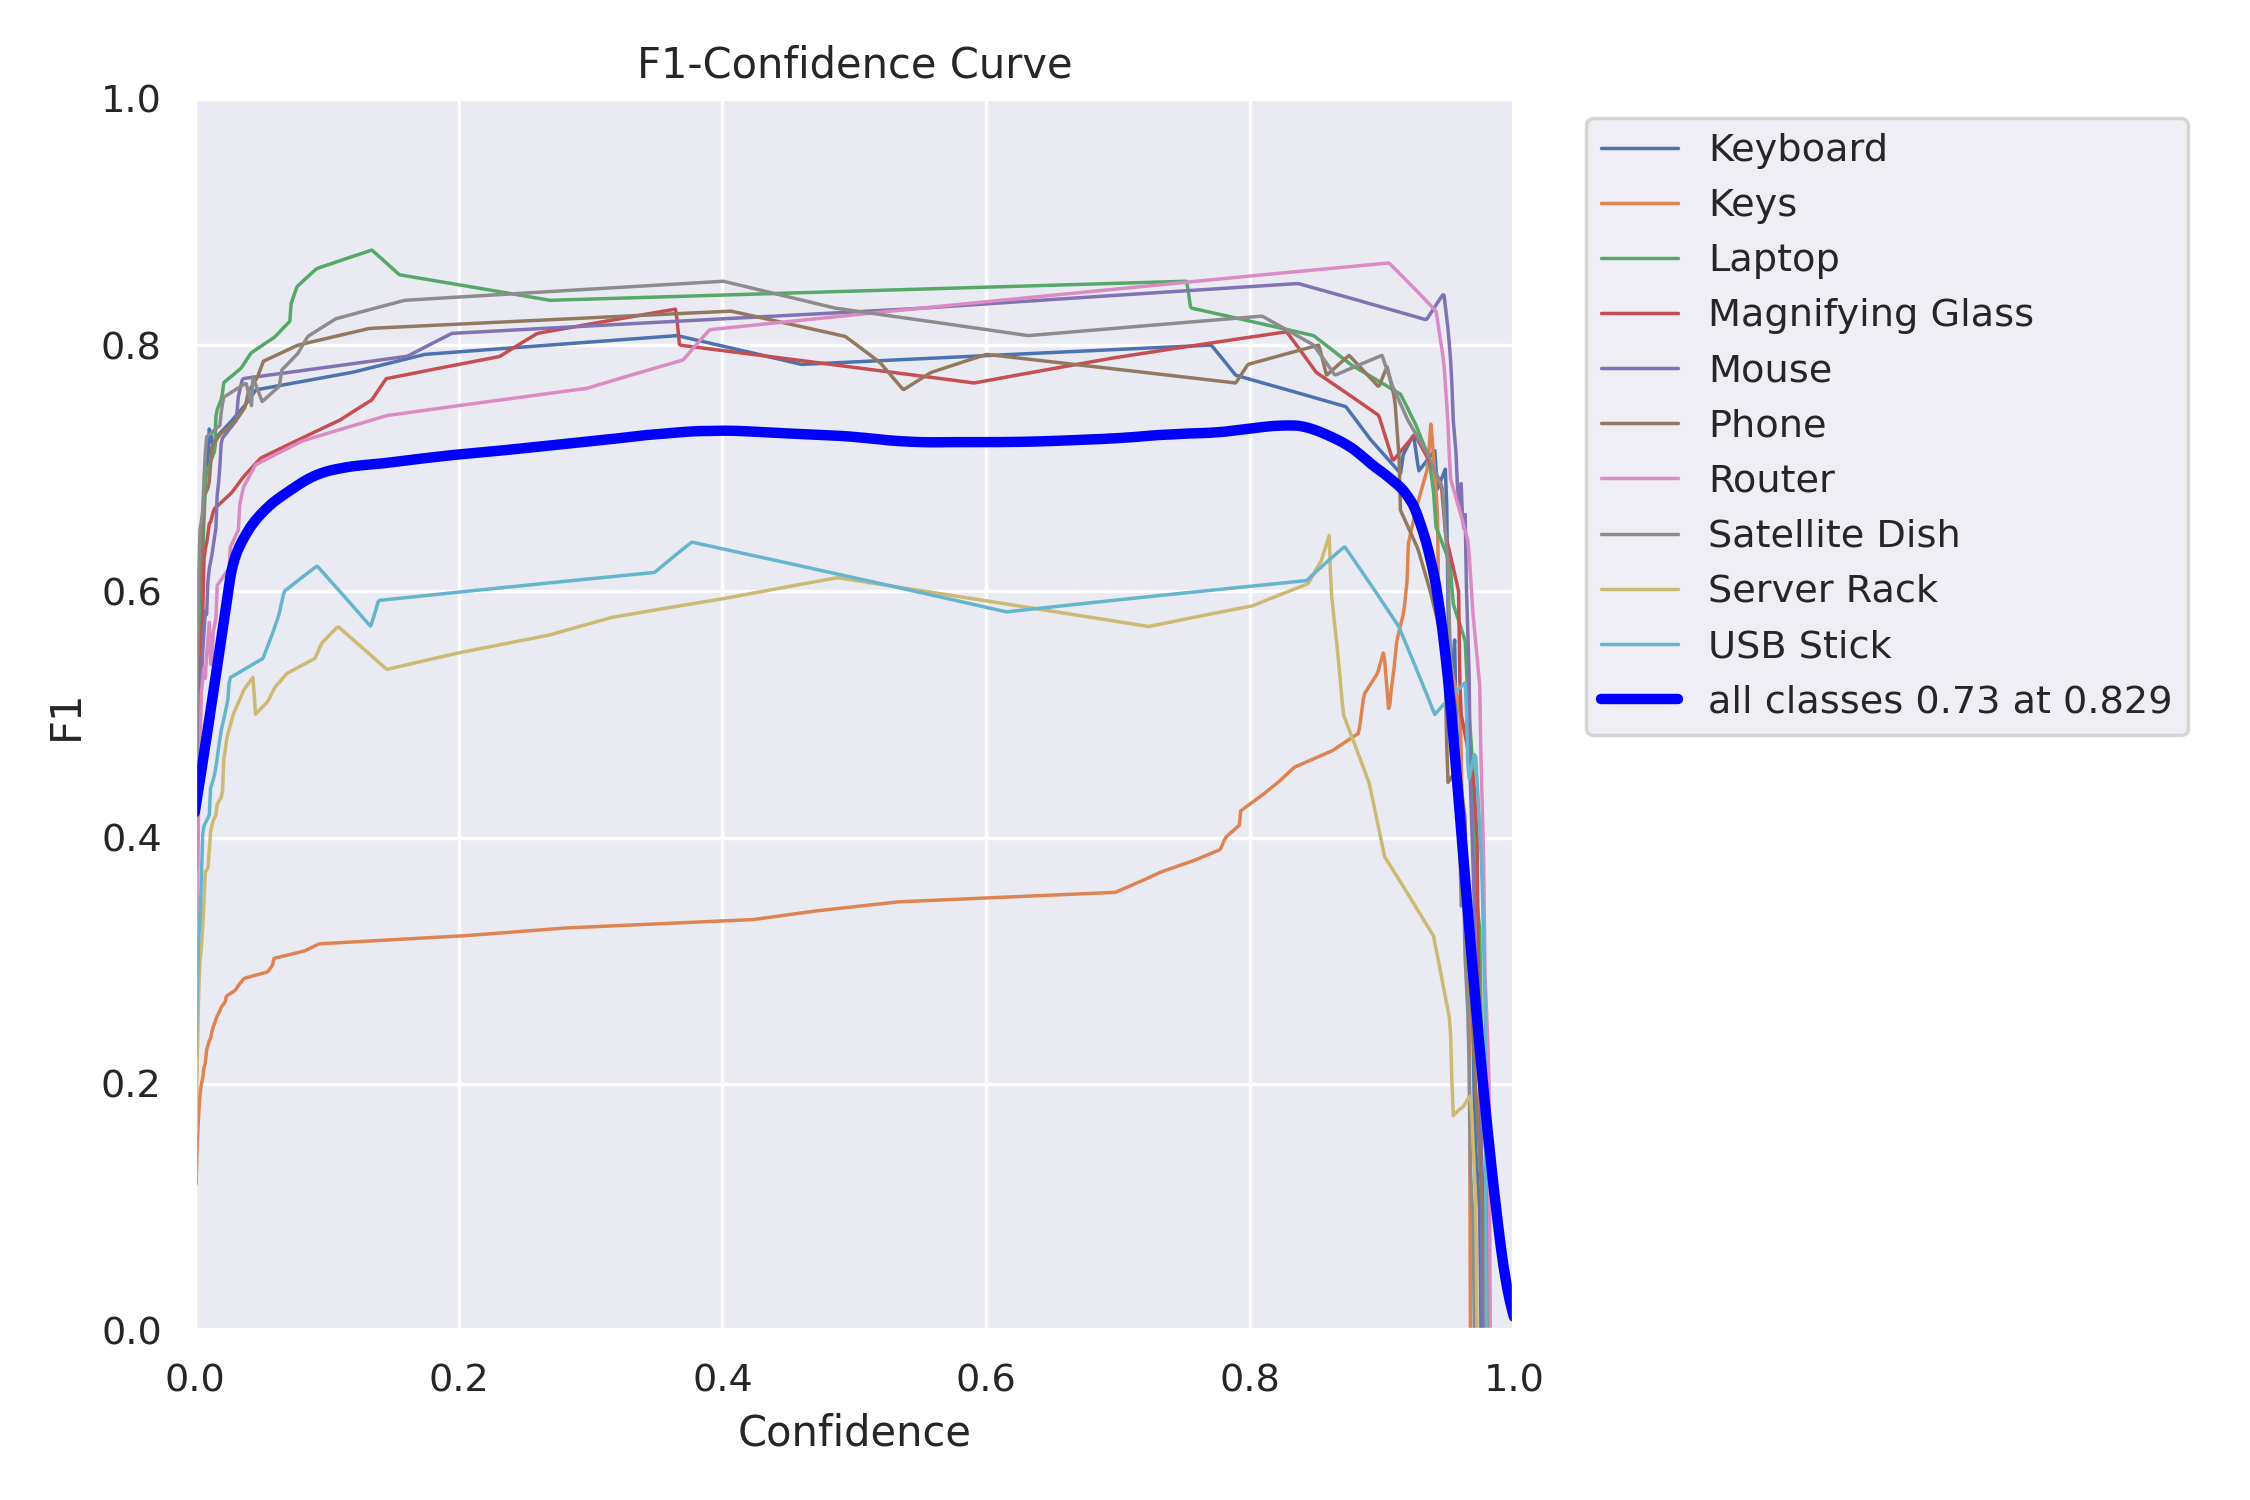

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8x_300/F1_curve.png', width=800)

### **Precision-Recall Curve**

This graph shows that the Precision is high but with low Recall. Hence the model is accurate when it detects an object but it may detect only some of the positive objects. 


/content


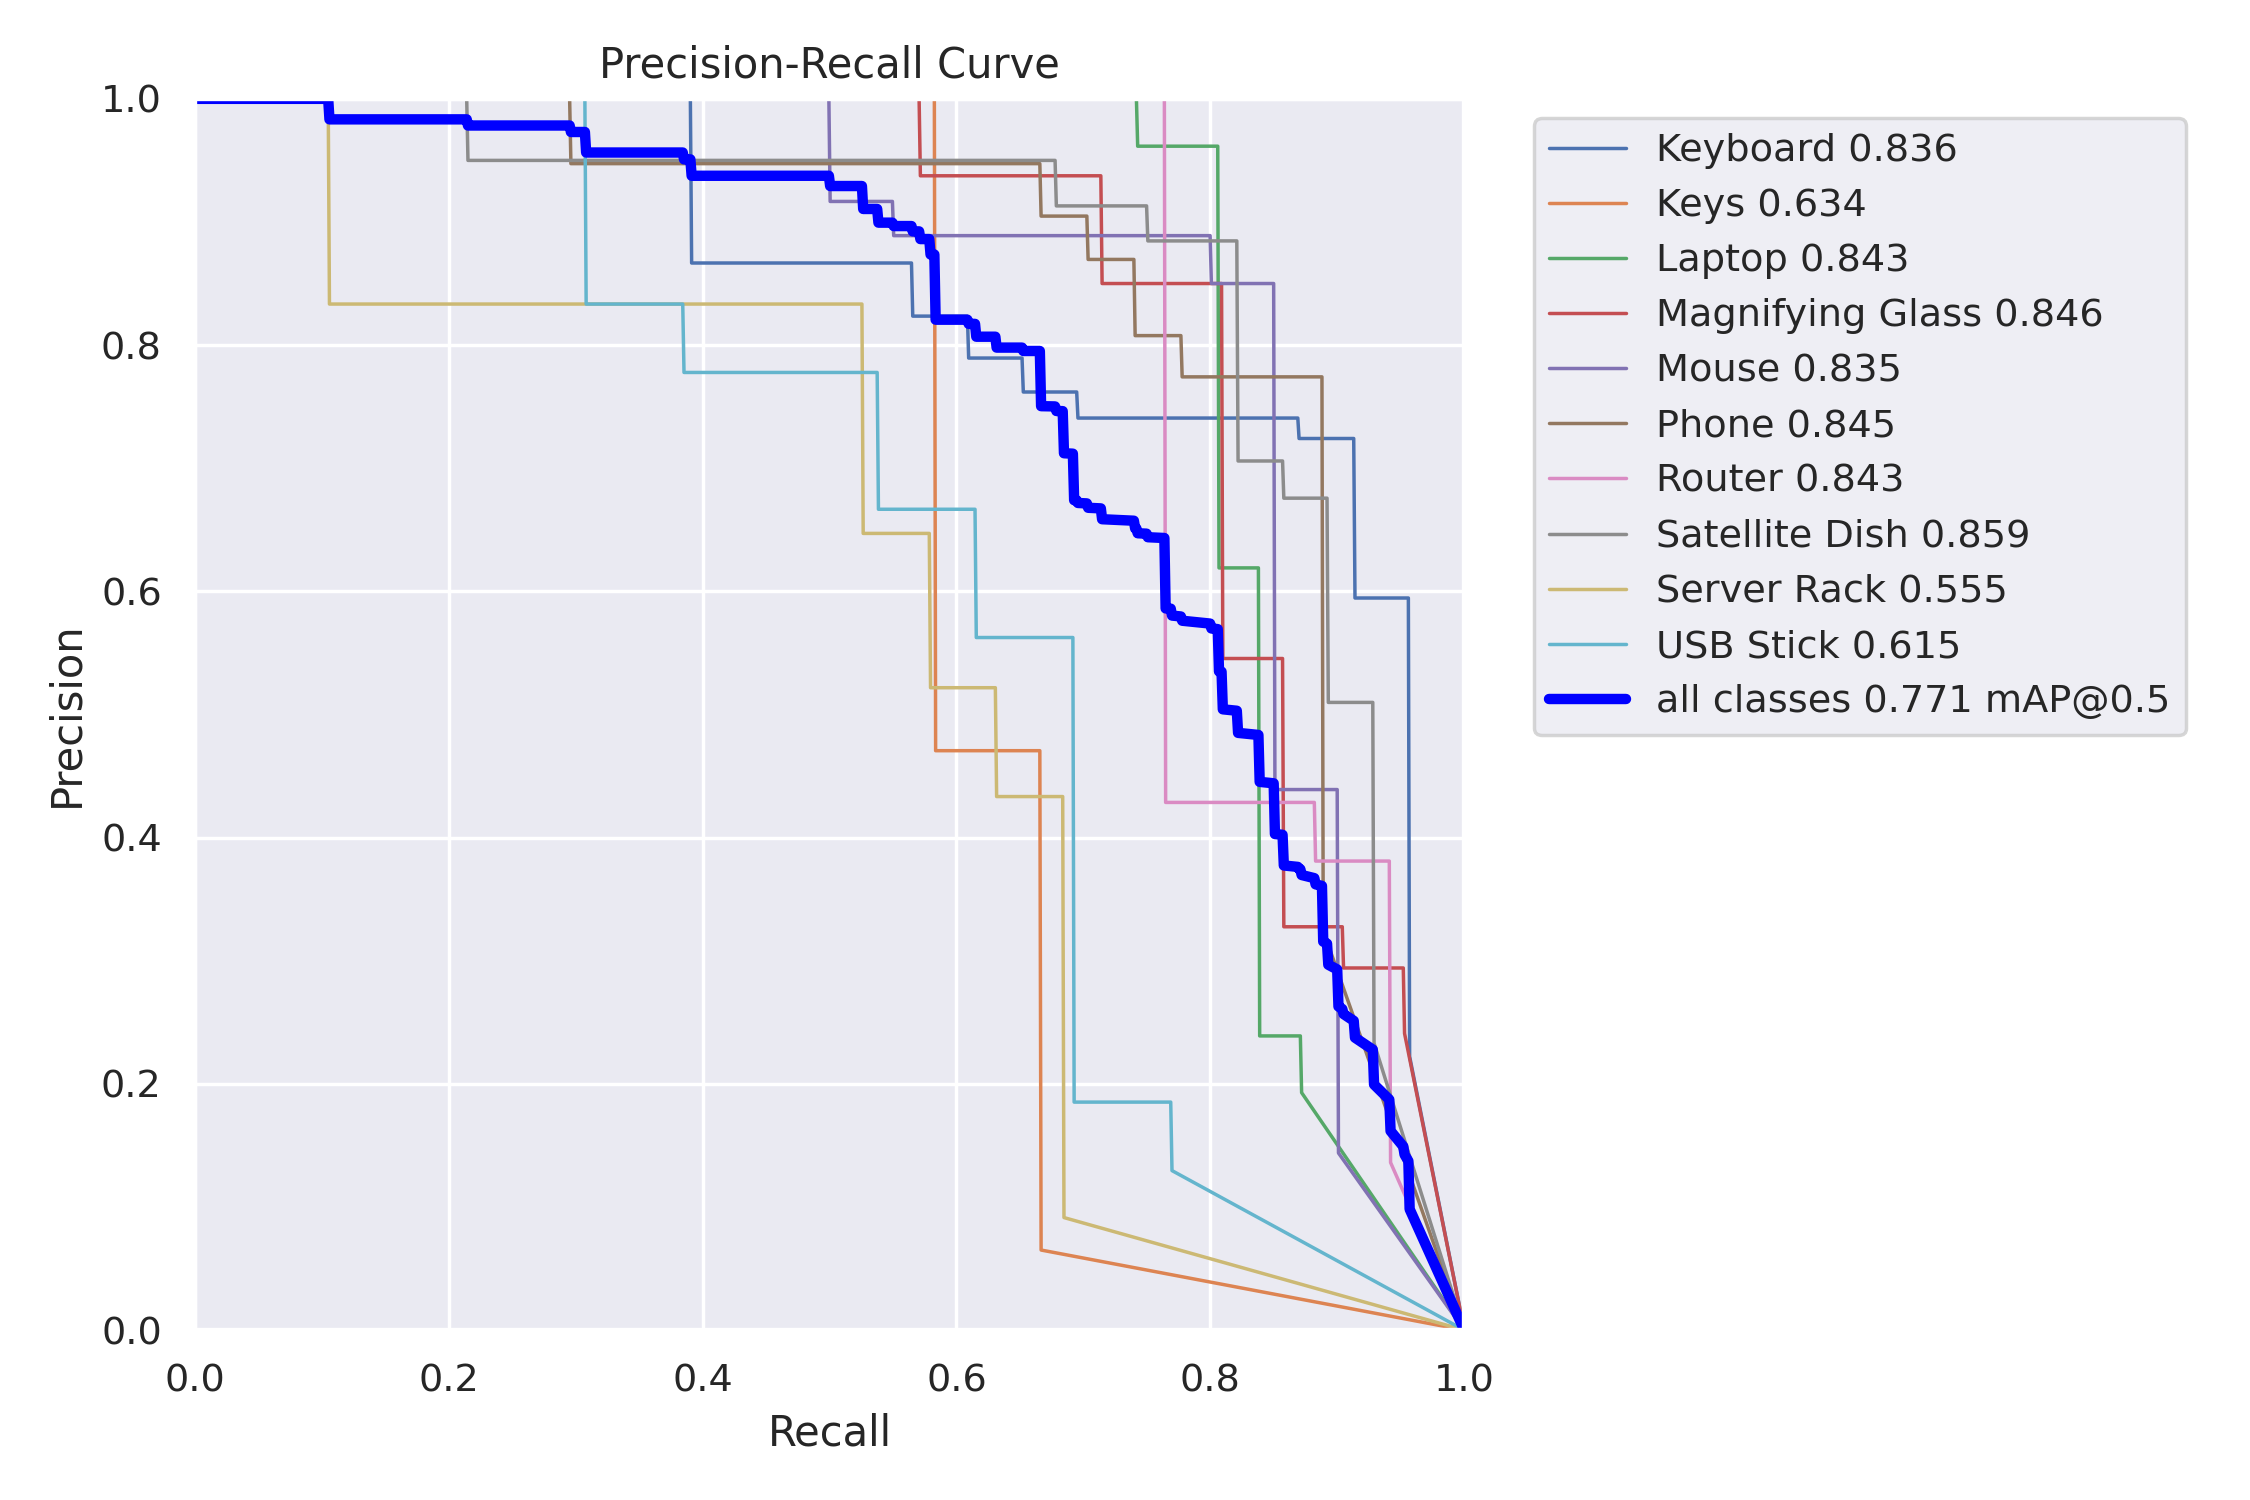

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8x_300/PR_curve.png', width=800)

/content


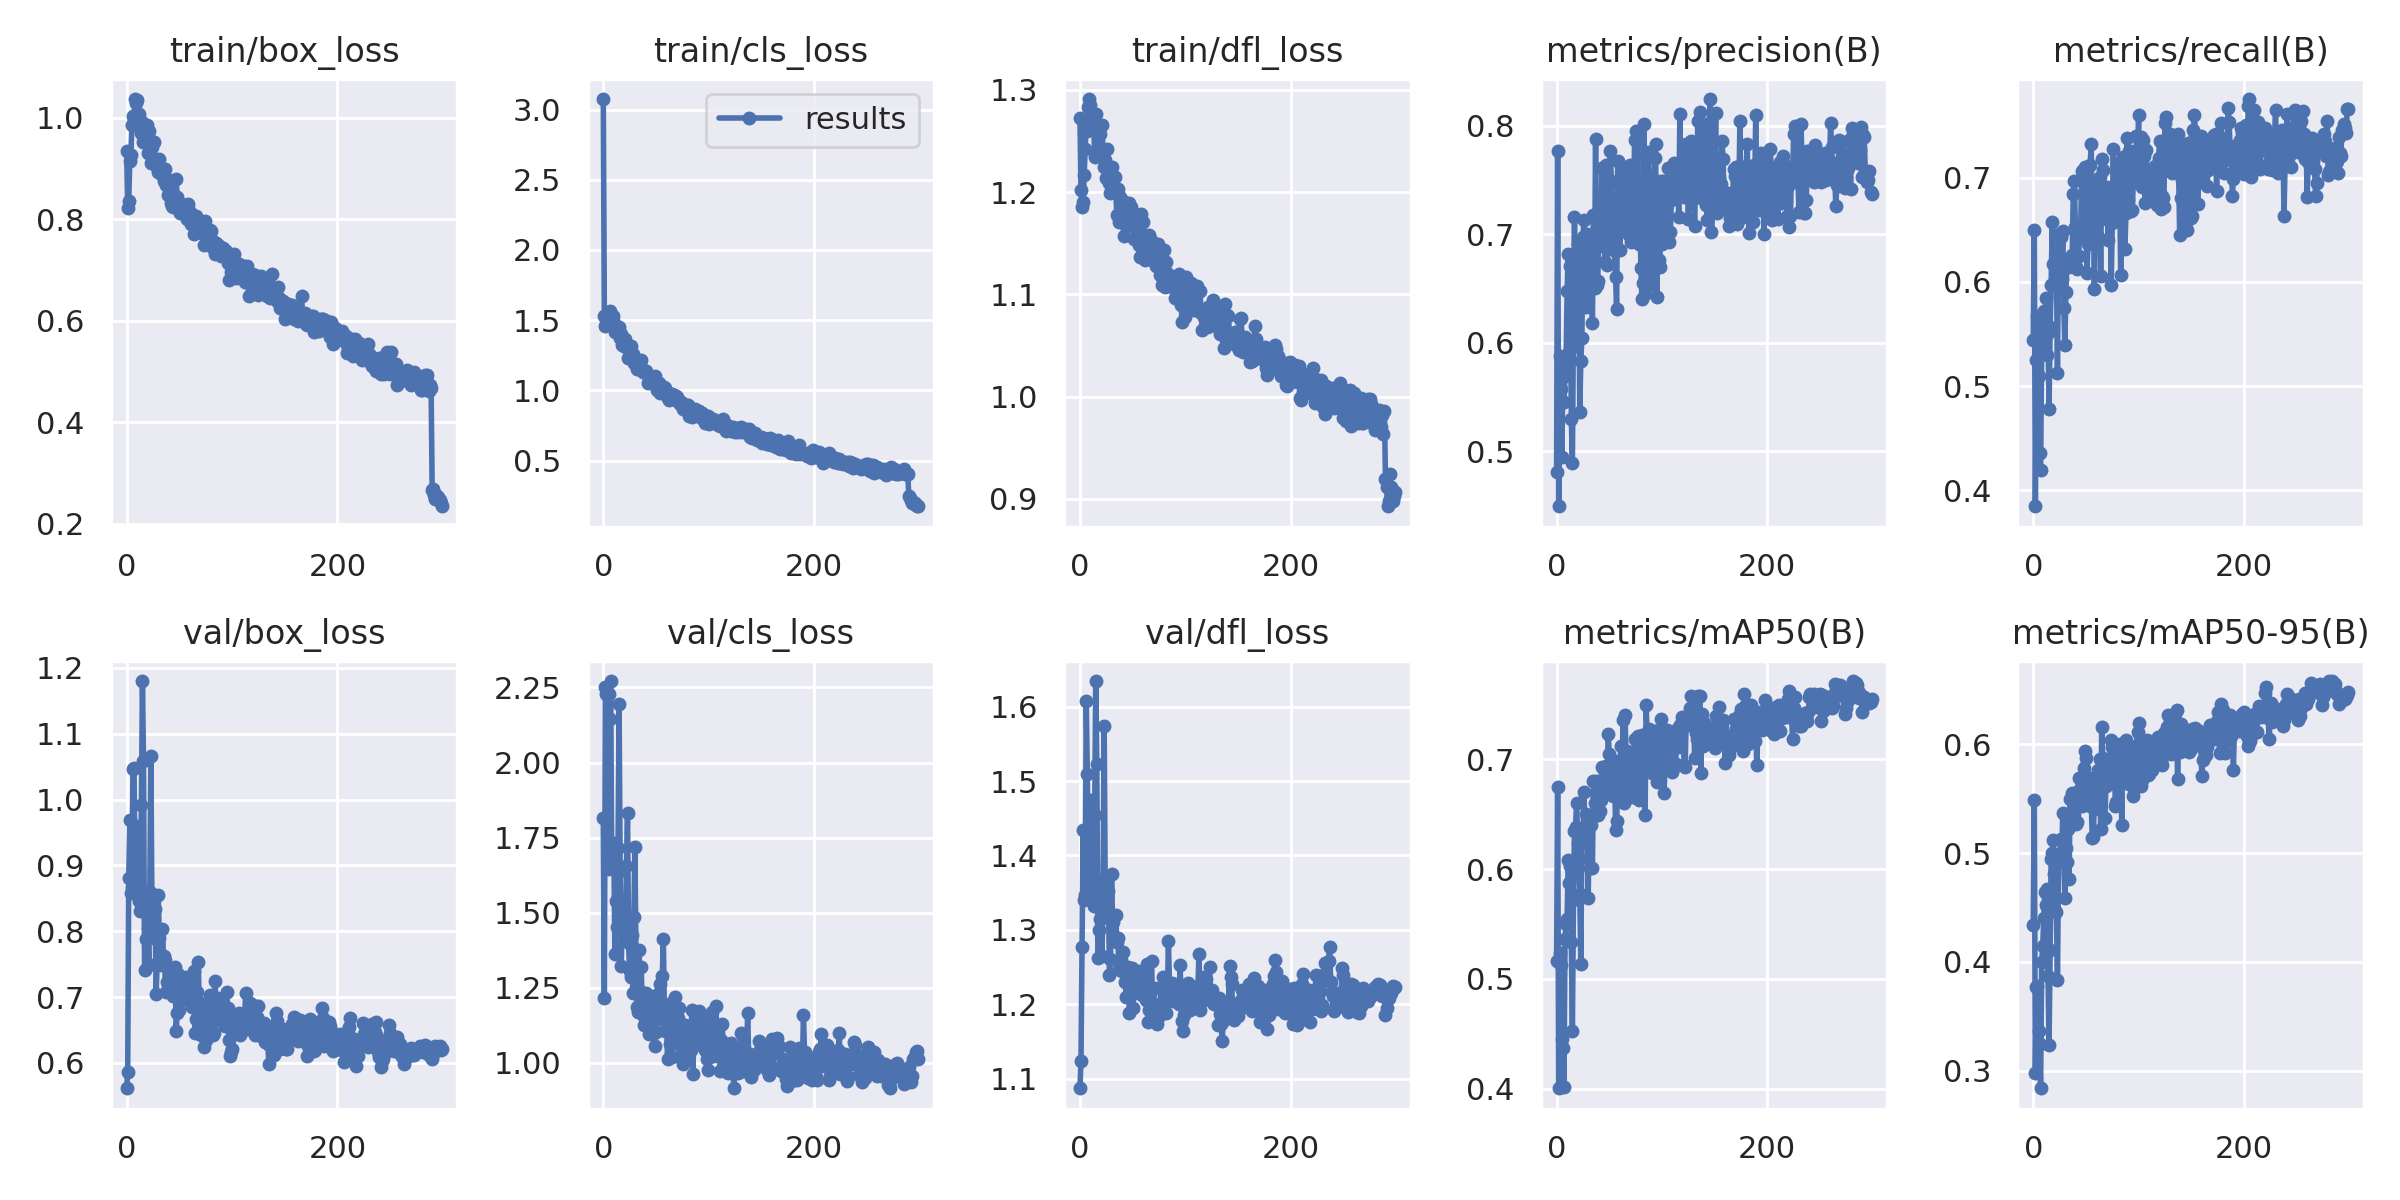

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8x_300/results.png', width=800)

The above graph shows the loss during the training. All training and validation loss has reduced gradually. The precision and recall metrics have increased.  

## **Validating the model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/yolov8x_300/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/MLChallenge-2/valid/labels.cache... 174 images, 0 backgrounds, 0 corrupt: 100% 174/174 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 211. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:04<00:00,  2.66it/s]
                   all        174        211      0.792      0.706      0.771      0.658
              Keyboard        174         23      0.728      0.815      0.836      0.773
                  Keys        174         12      0.323      0.667      0.634      0.505
                Laptop

The model is validated using hte validation dataset. It obtained high mAP value 0.77 with precision 0.79 and recall 0.70. The higher the mAP is the more precise the model is.

## **Predicting the model with the test data**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/44 /content/datasets/MLChallenge-2/test/images/Keyboard-114-_jpg.rf.e10ac90fa2e2dc143d69fc2e8b2096d6.jpg: 224x224 1 Keyboard, 1 Mouse, 25.9ms
image 2/44 /content/datasets/MLChallenge-2/test/images/Keyboard-13-_jpg.rf.8c907dd3825a1c8495186402e6fa66c5.jpg: 224x224 1 Keyboard, 26.0ms
image 3/44 /content/datasets/MLChallenge-2/test/images/Keyboard-26-_jpg.rf.0681af9bfb5c7d48e2b19305f8821918.jpg: 224x224 1 Keyboard, 25.9ms
image 4/44 /content/datasets/MLChallenge-2/test/images/Keyboard-38-_jpg.rf.9e7ffbaef43ceea1e8e3e187ef23e277.jpg: 224x224 1 Keyboard, 25.9ms
image 5/44 /content/datasets/MLChallenge-2/test/images/Keys-12-_png.rf.6890c61c20adbf1fb4c304a6a22d8d3e.jpg: 224x224 4 Keyss, 25.9ms
image 6/44 /content/datasets/MLChallenge-2/test/images/Keys-2-_png.rf.c2ae455b123f1458ad19fd749f93d5e9.jpg: 224x224 1 K

## **Detecting objects from the test images**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/ML_Challenge.png save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/ML_Challenge.png: 160x224 4 Mouses, 3 Server Racks, 2 USB Sticks, 37.0ms
Speed: 0.4ms pre-process, 37.0ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict2


/content


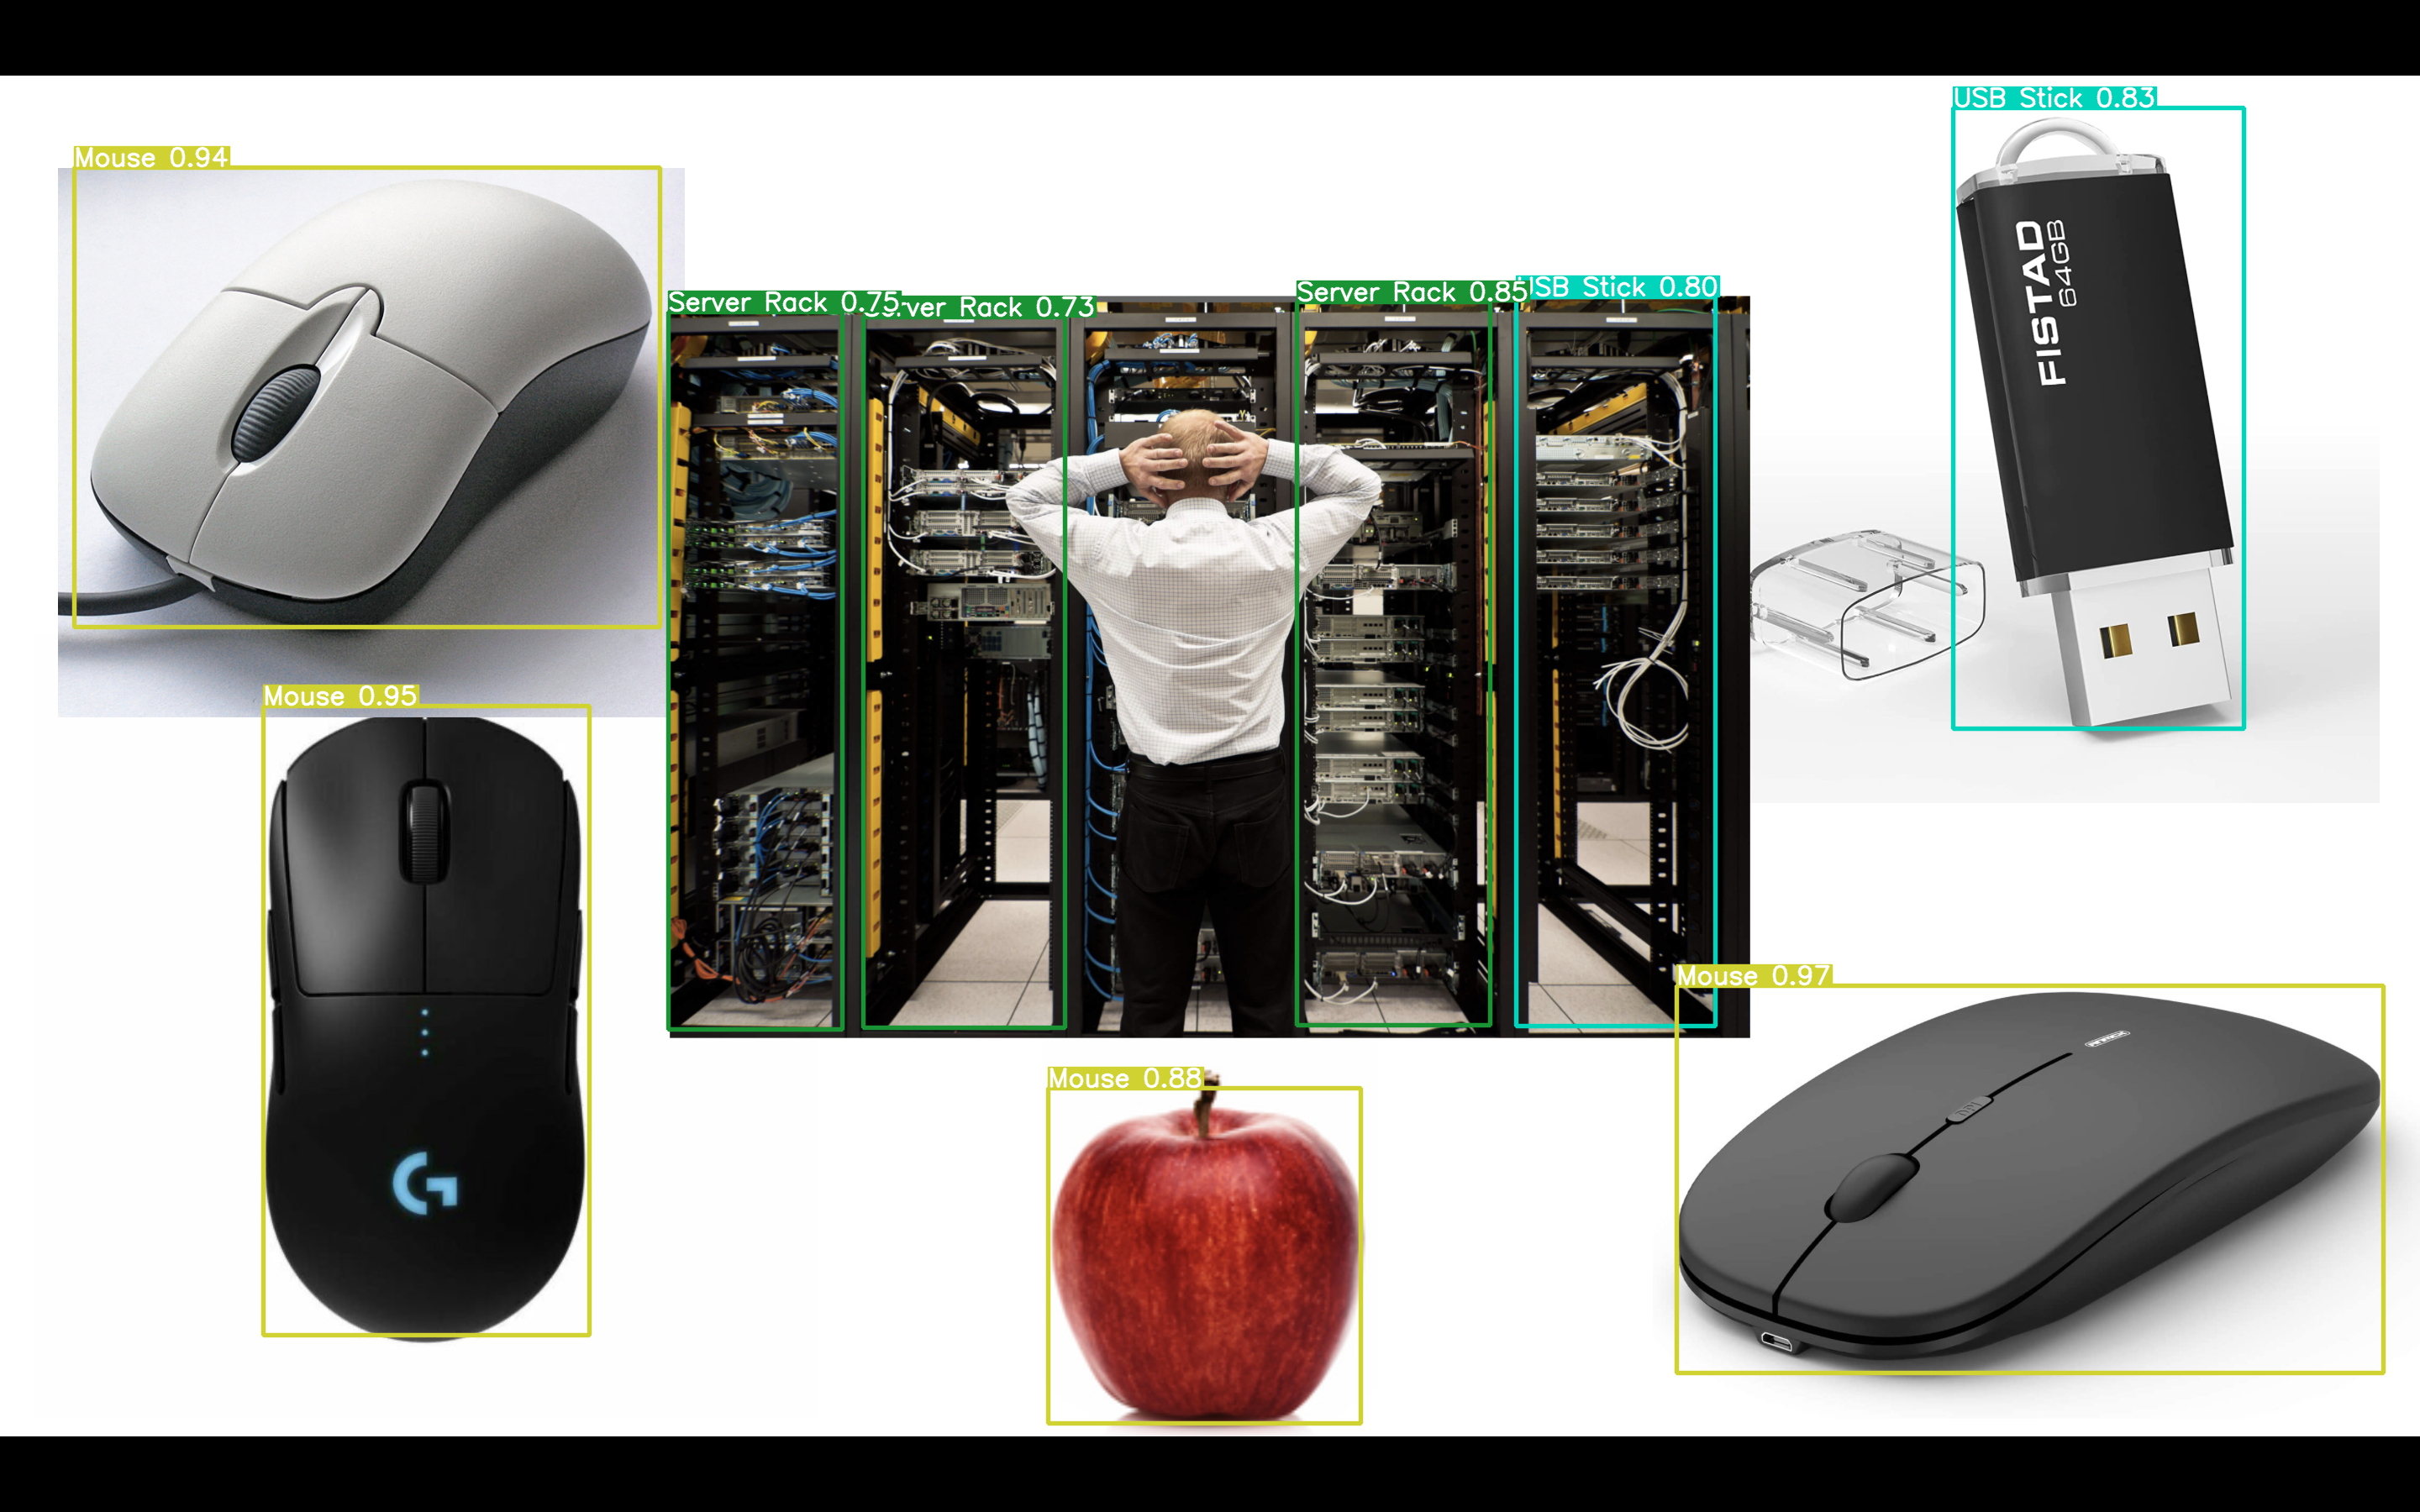

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict2/ML_Challenge.png', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test10.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test10.jpg: 160x224 1 Keys, 36.4ms
Speed: 0.2ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict3


/content


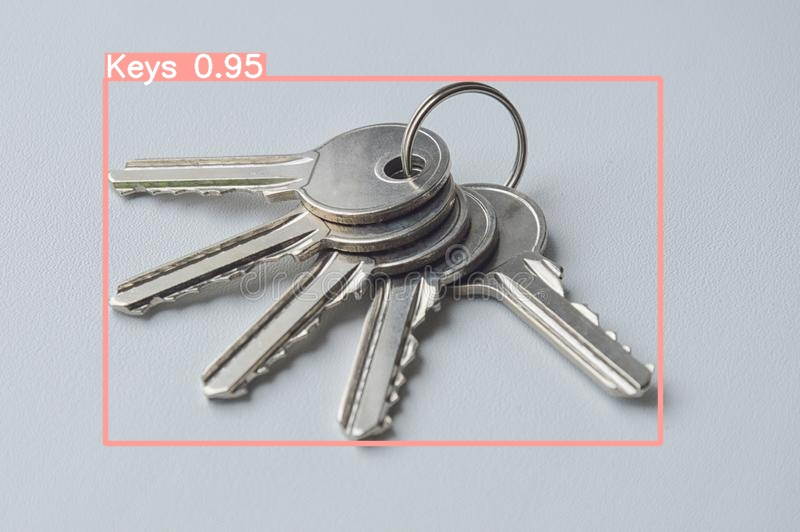

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict3/test10.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test2.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test2.jpg: 128x224 2 Routers, 25.0ms
Speed: 0.4ms pre-process, 25.0ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict10


/content


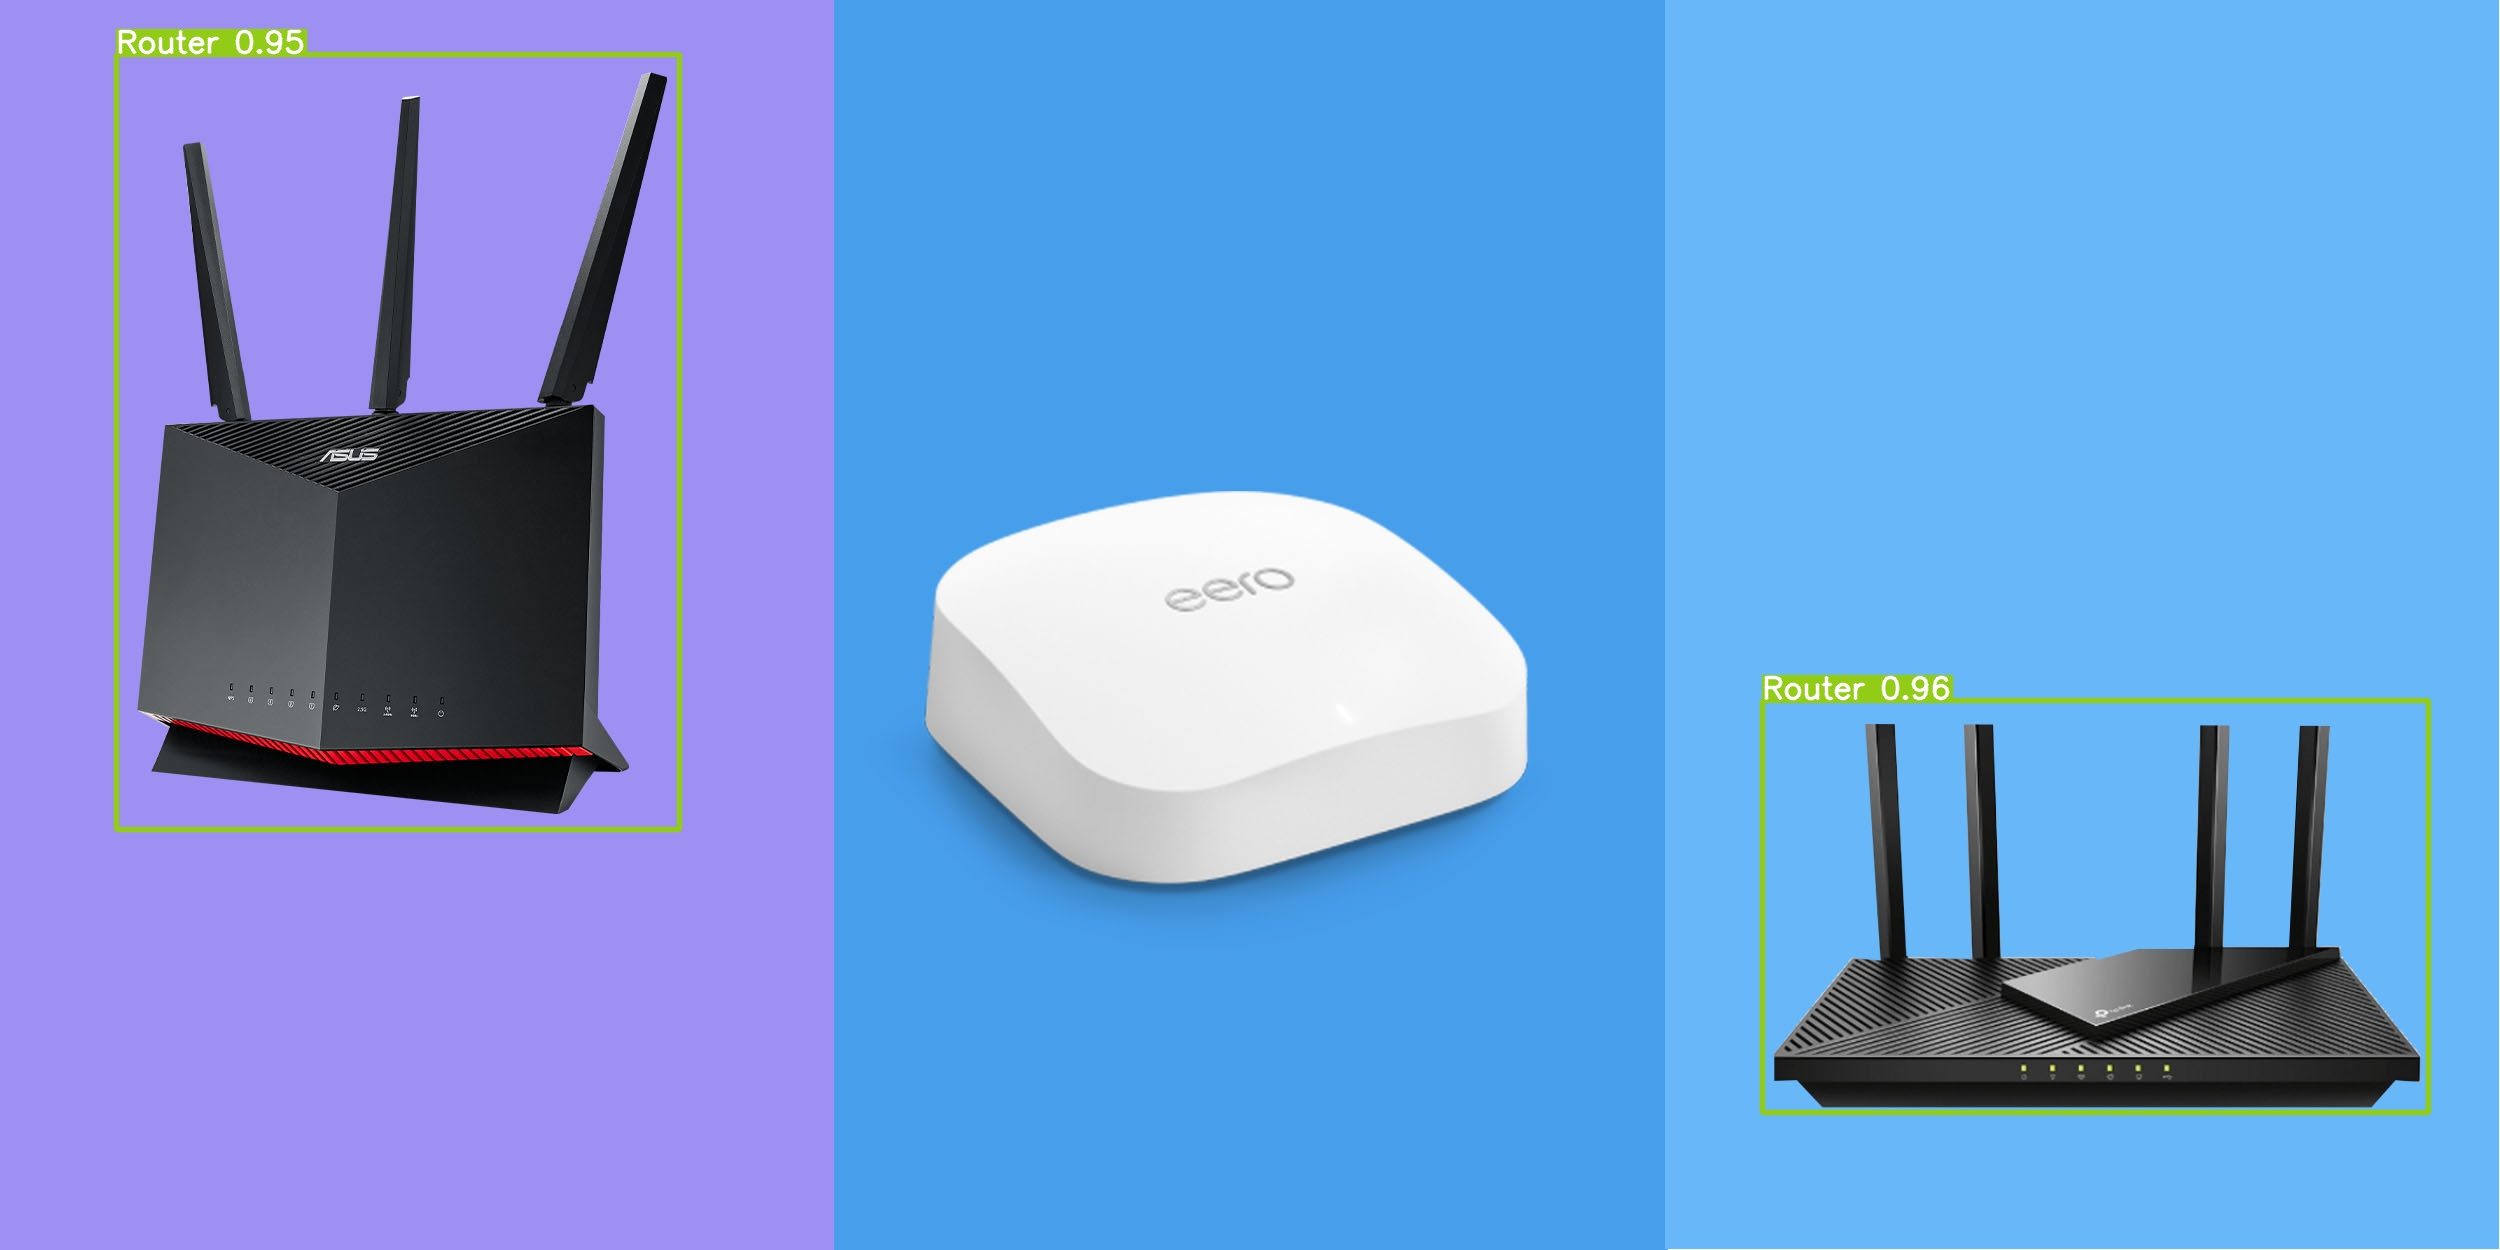

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict10/test2.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test3.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test3.jpg: 128x224 1 USB Stick, 24.4ms
Speed: 0.2ms pre-process, 24.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict11


/content


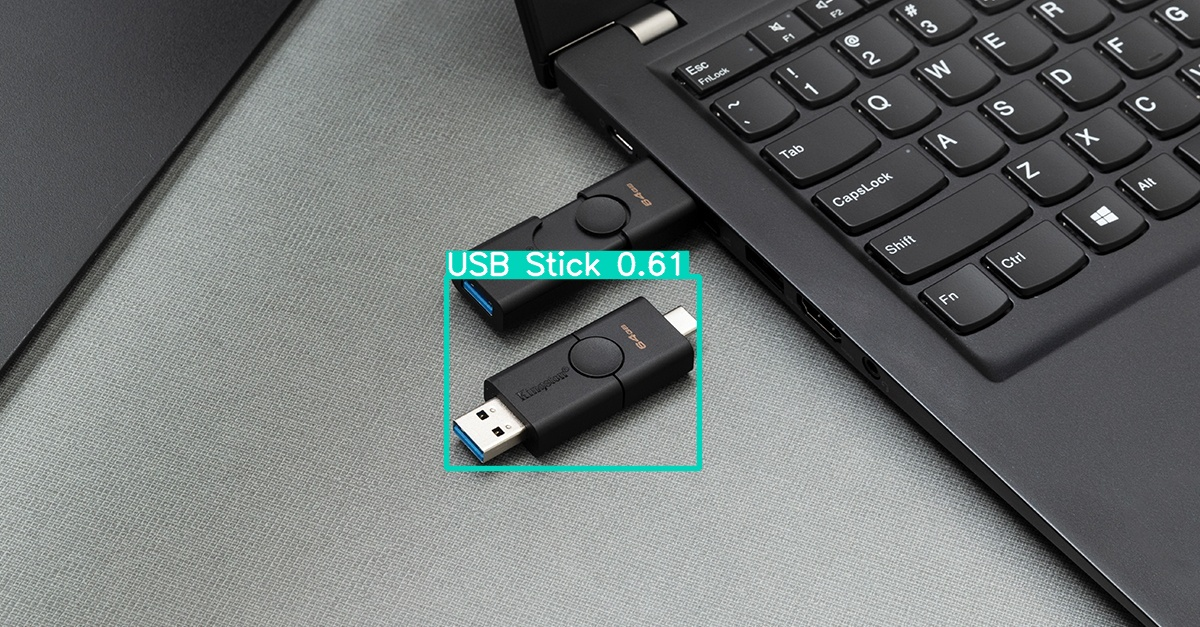

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict11/test3.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test4.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test4.jpg: 160x224 1 USB Stick, 36.4ms
Speed: 0.2ms pre-process, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict12


/content


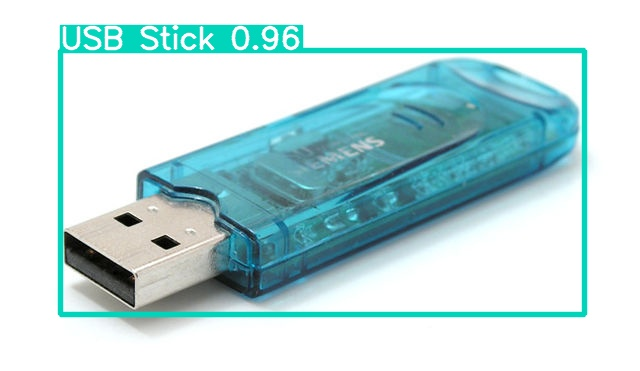

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict12/test4.jpg', height=600)

In [74]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test12.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test12.jpg: 192x224 1 Server Rack, 32.2ms
Speed: 0.4ms pre-process, 32.2ms inference, 3.2ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict23


/content


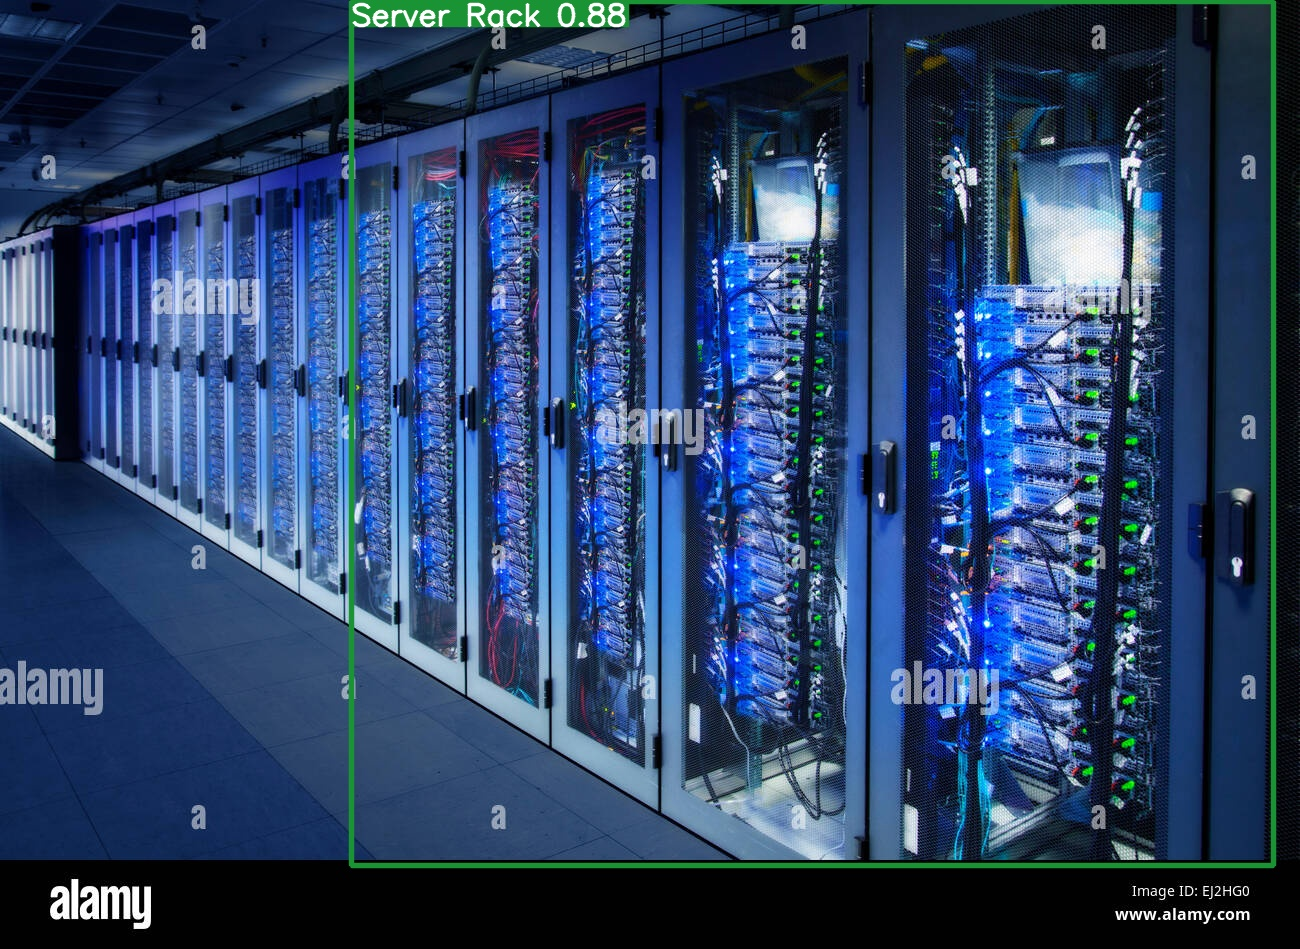

In [75]:
%cd {HOME}
Image(filename='runs/detect/predict23/test12.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test6.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test6.jpg: 224x160 1 Magnifying Glass, 37.2ms
Speed: 0.2ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict14


/content


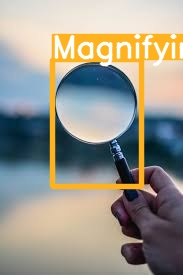

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict14/test6.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test7.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test7.jpg: 192x224 1 Satellite Dish, 25.6ms
Speed: 0.3ms pre-process, 25.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict15


/content


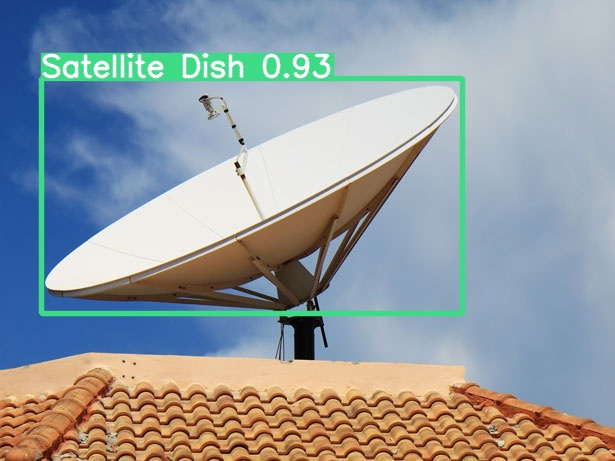

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict15/test7.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.5 source=/content/test_images/test8.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/test8.jpg: 224x160 1 Satellite Dish, 37.9ms
Speed: 0.3ms pre-process, 37.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict16


/content


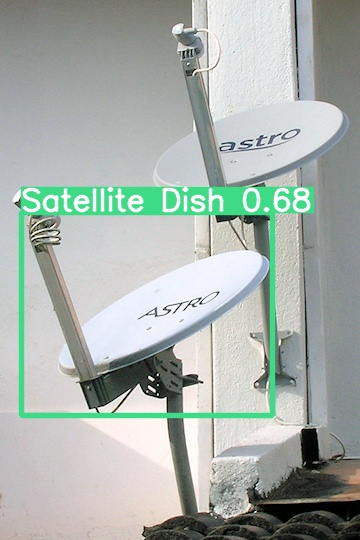

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict16/test8.jpg', height=600)

In [83]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.75 source=/content/test_images/phone.jpg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/phone.jpg: 192x224 1 Phone, 25.7ms
Speed: 0.3ms pre-process, 25.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict27


/content


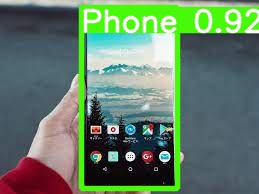

In [84]:
%cd {HOME}
Image(filename='runs/detect/predict27/phone.jpg', height=600)

In [70]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8x_300/weights/best.pt conf=0.25 source=/content/test_images/Laptop2.jpeg save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
image 1/1 /content/test_images/Laptop2.jpeg: 192x224 1 Keyboard, 1 Mouse, 25.8ms
Speed: 0.3ms pre-process, 25.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict21


/content


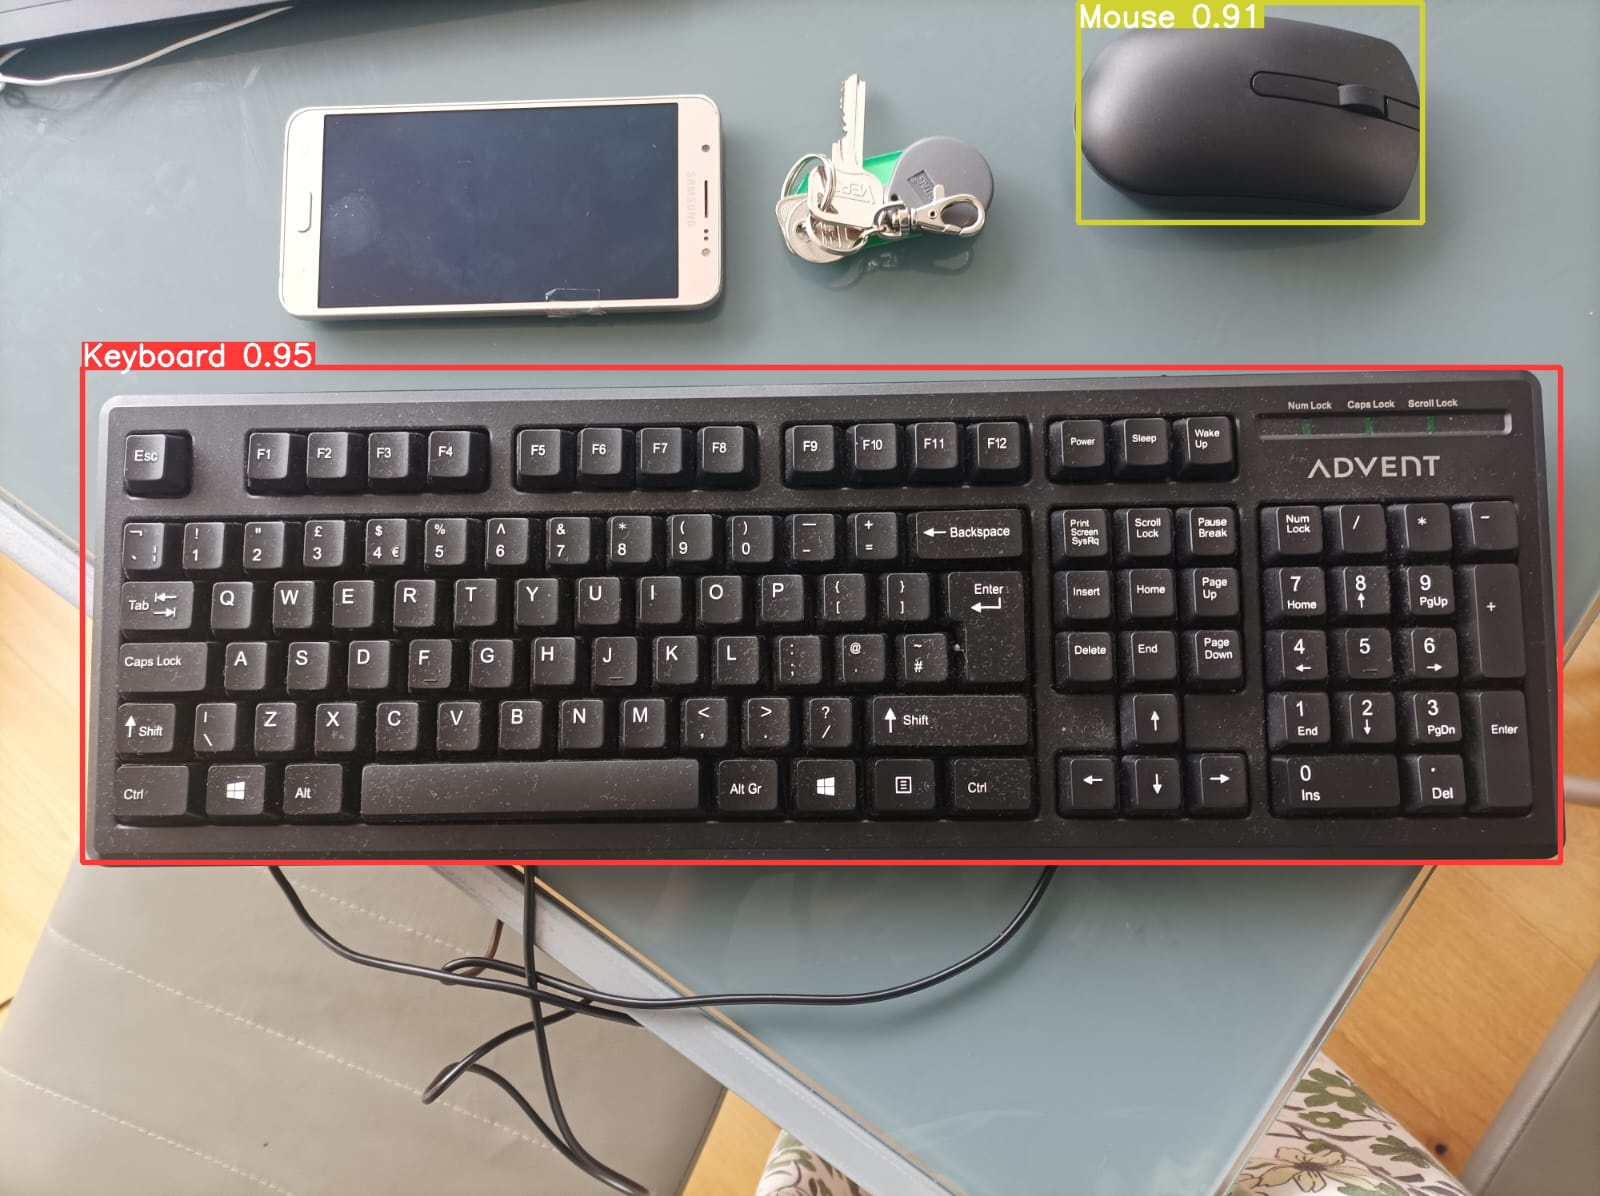

In [71]:
%cd {HOME}
Image(filename='runs/detect/predict21/Laptop2.jpeg', height=600)

/content


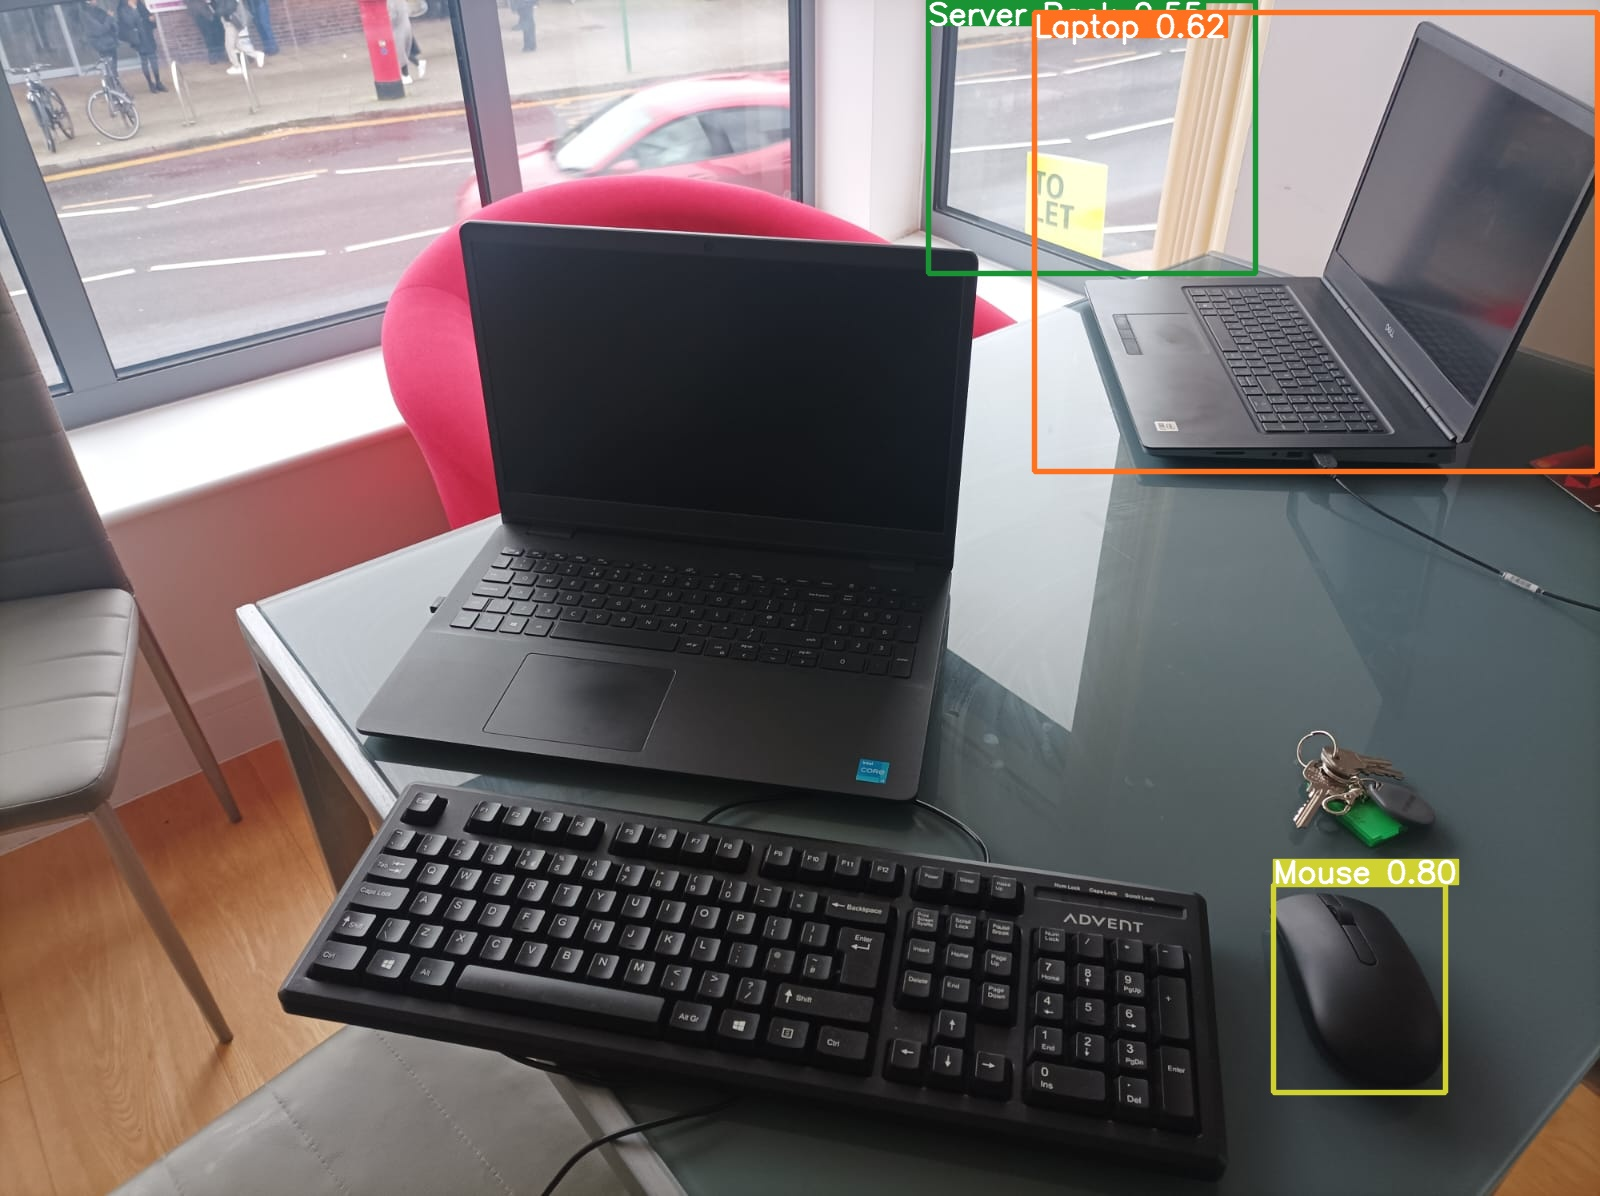

In [67]:
%cd {HOME}
Image(filename='runs/detect/predict19/Laptop1.jpeg', height=600)

### **Exporting custom yolov8x model weight's**

In [ ]:
from google.colab import files
files.download('./runs/detect/yolov8x_300/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**

The Yolov8x model has been trained and tested on different series of images. The model obtainted a higher Mean Precision Average of 0.77. The Yolov8x custom model was able to successfully detect all the 10 items with higher threshold that were trained on. 

However, the model makes few mistakes by making wrong detection. In future, the model performance can be improved by,



*   Collecting more images and annotating images by drawing bounding boxes tightly.
*   Training the model for more number of epochs and with different parameters.

Further we will continue to work to enhance the model performance.

